# Problem 1

There are 8 red and 6 blue balls in a box. 2 balls are taken randomly (without return). Find statistical and theoretical probabilities that the two balls have different colors.

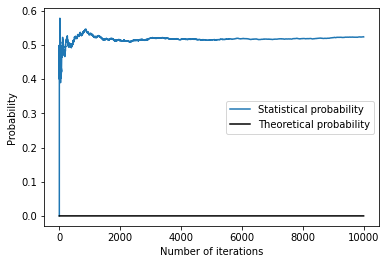

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

N=10000
P_A = []
N_A = 0
for i in range(0, N):
    index = np.random.choice(14, size=2, replace=False)
    if (index[0]<8 and index[1]>7) or (index[0]>7 and index[1]<8):
        N_A+=1
    P_A.append(N_A / (i+1))
    
        
plt.xlabel('Number of iterations')
plt.ylabel('Probability')
plt.plot(np.arange(1, N+1), P_A, label = 'Statistical probability')
    
plt.plot(range(0, N), [52*12*11*10*9*8*7/(52*51*50*49*48*47*46)] * N, 'k', label = 'Theoretical probability')  # 'k' - black color
plt.legend()
plt.show()

# Problem 2

Find statistical and theoretical probabilities that, out of $n$ coin flips, you got between $k_1$ and $k_2$ heads.

0.0592041015625


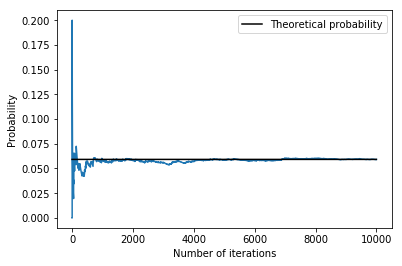

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import factorial

n=15
k1=0
k2=5

N=10000
P_A = []
N_A = 0
for i in range(0, N):
    index = np.random.choice(2, size=n, replace=True)
    #print(index.sum())
    if (index.sum()<k2) and (index.sum()>k1):
        N_A+=1
        #print(N_A)
    P_A.append(N_A / (i+1))
    
        
plt.xlabel('Number of iterations')
plt.ylabel('Probability')
plt.plot(np.arange(1, N+1), P_A)

P_theory=0
for i in range(k1+1,k2):
    P_theory+=(0.5**n)*(factorial(n)/(factorial(i)*factorial(n-i)))
    
print(P_theory)  
plt.plot(range(0, N), [P_theory] * N, 'k', label = 'Theoretical probability')  # 'k' - black color
plt.legend()
plt.show()

# Problem 3

Read the dataset "student-por.csv" in Pandas DataFrame format. Based only on the columns "G3" and "school" statistically estimate:

a) Probability that a randomly chosen student is from school "GP" and probability that the student is from school "MS".

b) Probability that a randomly chosen student has high score ("G3">=15), probability of mid score (5<"G3"<15) and probability of low score ("G3"<5).

c) Conditional probabilities that a random student has high score, given that she/he is from a particular school: 𝑃(high score|school=′𝐺𝑃′) and 𝑃(high score|school=′𝑀𝑆′).

d) Using Bayes equation calculate the probabilities: P(school=′𝐺𝑃′|high schore) and P(school=′MS′|high schore).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# read data:
data_por = pd.read_csv("student-por.csv")
data_por.head()  # pick into DataFrame

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
attributes = ["G3","school"]
data_por = data_por[attributes]
data_por.head()

,G3,school
0,11,GP
1,11,GP
2,12,GP
3,14,GP
4,13,GP


In [ ]:
temp=data_por.school.value_counts()
temp

GP    423
MS    226
Name: school, dtype: int64

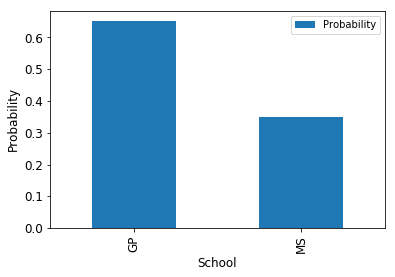

    Probability
GP     0.651772
MS     0.348228


In [ ]:
P_school = pd.DataFrame((temp/temp.sum()).sort_index())  # sort_index() - sorts according to the row names
P_school.index = ["GP","MS"]
P_school.columns = ["Probability"]  # This DataFrame has only one column

# Now we plot these probabilities (using bar plot)
P_school.plot.bar(fontsize=12)
plt.ylabel("Probability",fontsize=12)
plt.xlabel("School",fontsize=12)
plt.show()
print(P_school)

In [ ]:
data_temp = (data_por["G3"]>=15).value_counts()
data_temp

False    518
True     131
Name: G3, dtype: int64

In [ ]:
data_temp1 = ((data_por["G3"]>5) & (data_por["G3"]<15)).value_counts()
data_temp1

True     501
False    148
Name: G3, dtype: int64

In [ ]:
data_temp2 = (data_por["G3"]<=5).value_counts()
data_temp2

False    632
True      17
Name: G3, dtype: int64

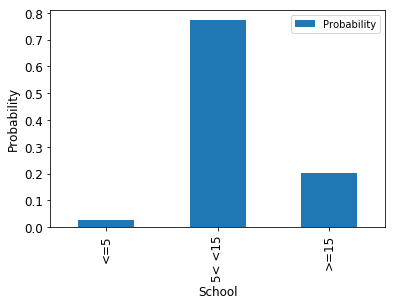

        Probability
<=5        0.026194
5< <15     0.771957
>=15       0.201849


In [ ]:
P_G3=pd.DataFrame([data_temp2[True], data_temp1[True],data_temp[True]])/len(data_por)
P_G3.index = ["<=5","5< <15",">=15"]
P_G3.columns = ["Probability"]  # This DataFrame has only one column

# Now we plot these probabilities (using bar plot)
P_G3.plot.bar(fontsize=12)
plt.ylabel("Probability",fontsize=12)
plt.xlabel("School",fontsize=12)
plt.show()
print(P_G3)

In [ ]:
data_temp3 = data_por[data_por["G3"]>=15]['school'].value_counts()
data_temp3

GP    100
MS     31
Name: school, dtype: int64

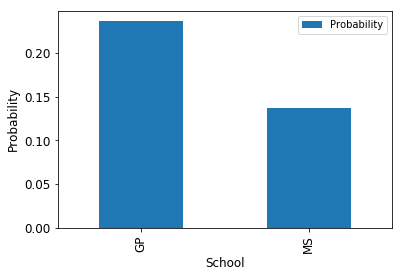

    Probability
GP     0.236407
MS     0.137168


In [ ]:
P_cond1=pd.DataFrame(data_temp3/temp)
P_cond1.columns = ["Probability"]  # This DataFrame has only one column

# Now we plot these probabilities (using bar plot)
P_cond1.plot.bar(fontsize=12)
plt.ylabel("Probability",fontsize=12)
plt.xlabel("School",fontsize=12)
plt.show()
print(P_cond1)

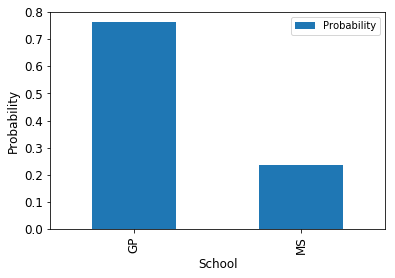

    Probability
GP     0.763359
MS     0.236641


In [ ]:
P_cond2=pd.DataFrame(P_cond1*P_school/P_G3.loc['>=15'])
P_cond2.columns = ["Probability"]  # This DataFrame has only one column

# Now we plot these probabilities (using bar plot)
P_cond2.plot.bar(fontsize=12)
plt.ylabel("Probability",fontsize=12)
plt.xlabel("School",fontsize=12)
plt.show()
print(P_cond2)

In [ ]:
P_G3.loc['>=15']

Probability    0.201849
Name: >=15, dtype: float64

# Problem 3

Read the dataset "temperature.csv" in Pandas DataFrame format.

a) Choose one city (column) and plots its normalized histogram (adjust the number of bins).

b) Based on the plotted histogram, find and plot the normal (Gaussian) distribution (or a Gaussian mixture) which visually seems to be the best approximation of the normalized temperatures histogram (plot the obtained approximation and the histogram on the same figure). 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


plt.style.use('seaborn-talk')
df1 = pd.read_csv("temperature.csv")
print(df1.columns)
df1.head()

Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa',
       'Nahariyya', 'Jerusalem'],
      dtype='object')


,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [ ]:
city = ['Chicago']
df = pd.read_csv("temperature.csv",usecols=city)
df.head()

,Chicago
0,NaN
1,284.010000
2,284.054691
3,284.177412
4,284.300133


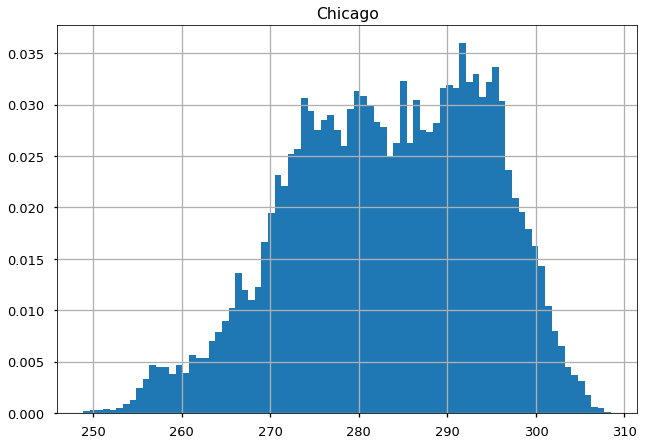

In [ ]:
hist = df.hist(density=True,bins=80)
plt.show()

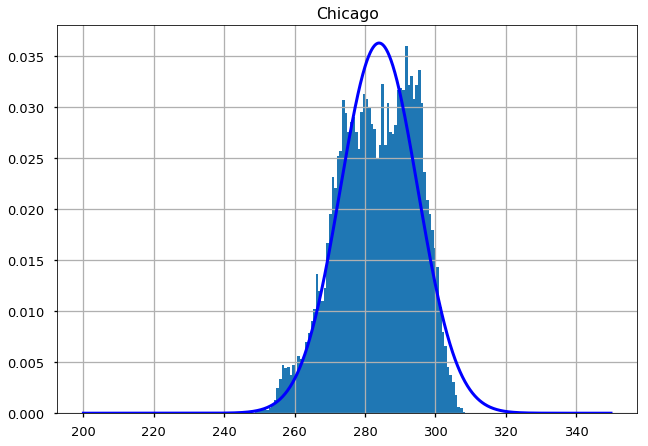

In [ ]:
hist = df.hist(normed=True,bins=80)

step=0.1
x = np.arange(200, 350, step)
m=284
sig=11
P_norm = norm.pdf(x, m, sig)

plt.plot(x, P_norm, 'b', linewidth=3.0)
plt.show()